In [1006]:
import importlib
import restaurant_analytics
import feature_restaurant_analytics
import hac_dinamico
importlib.reload(restaurant_analytics)
importlib.reload(feature_restaurant_analytics)
importlib.reload(hac_dinamico)
import pandas as pd
from restaurant_analytics import MenuEngineeringAnalyzer
from feature_restaurant_analytics import pop_mean
from hac_dinamico import dynamic_hac_silhouette, plot_clusters_2d
import seaborn as sns

In [1007]:
df_tienda = pd.read_csv("/ML/projects/Informe Final/ventas_tiendas_tumbes.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/ML/projects/Informe Final/ventas_tiendas_tumbes.csv'

In [956]:
df_tienda["codigo_producto"] = df_tienda["codigo_producto"].astype(str)
df_fondos=df_tienda[df_tienda["categoria"]=="PLATO_FONDO_INDIVIDUAL"][["codigo_producto","item_nombre","margen", "unidades_totales","q_insumos"]]

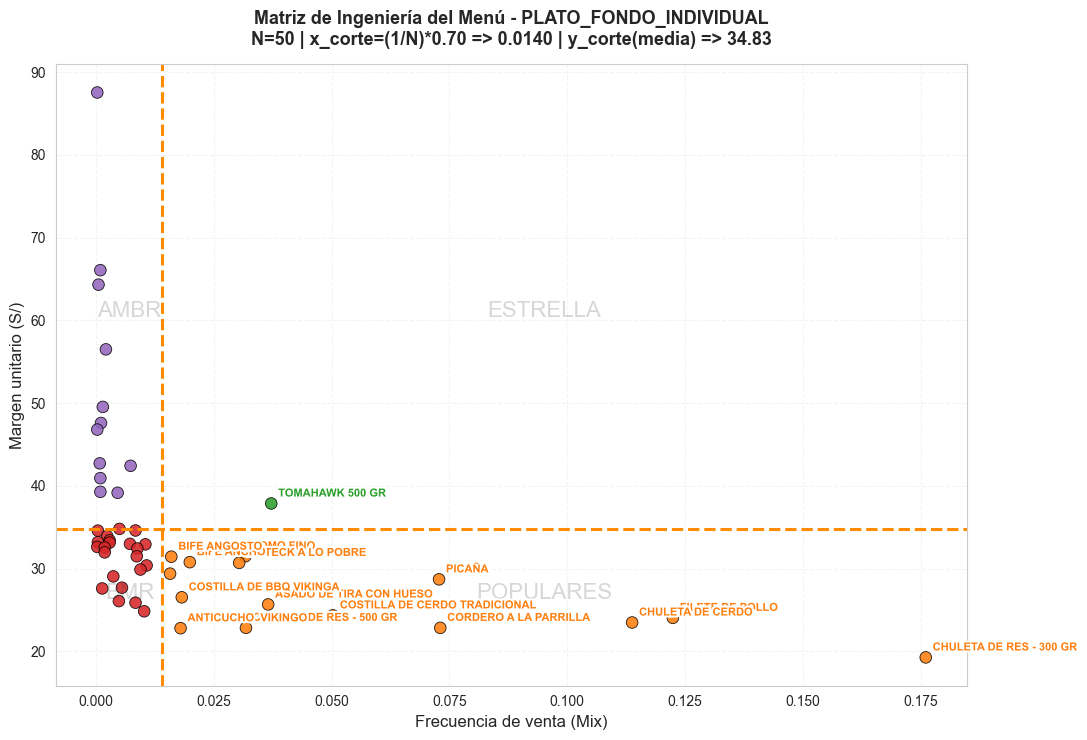

(<Figure size 1100x750 with 1 Axes>,
 <Axes: title={'center': 'Matriz de Ingeniería del Menú - PLATO_FONDO_INDIVIDUAL\nN=50 | x_corte=(1/N)*0.70 => 0.0140 | y_corte(media) => 34.83'}, xlabel='Frecuencia de venta (Mix)', ylabel='Margen unitario (S/)'>)

In [957]:
an = MenuEngineeringAnalyzer(
    col_nombre="item_nombre",
    col_units="unidades_totales",
    col_margen="margen",
    col_categoria="categoria",
    popularity_factor=0.70,
    margin_method="mean",
    quadrant_labels=("ESTRELLA","POPULARES","AMBR","BMR"),
)

an.fit(df_tienda, category_value="PLATO_FONDO_INDIVIDUAL")

tabla = an.table(sort_by="cm_total")
an.plot()

# label_mode: "all" | "topk" | "smart" | "none"
#size_by="cm_total", size_transform="rank", clip_percentiles=(10,95)
# size_by="cm_total", size_transform="log1p"

In [958]:
tabla.groupby('cuadrante').agg(
    {
        "item_nombre":"nunique",
        "mix":"sum",
        "margen":"mean",
        "cm_share":"sum",
        "cm_total":"sum"
     }
)

,item_nombre,mix,margen,cm_share,cm_total
cuadrante,,,,,
AMBR,12,0.021076,51.906619,0.037230,7382.460307
BMR,22,0.115329,31.189326,0.135873,26942.480641
ESTRELLA,1,0.037178,37.872860,0.054243,10755.892116
POPULARES,15,0.826417,26.294336,0.772654,153210.660174


In [959]:
tabla

,item_nombre,categoria,cuadrante,mix,margen,unidades_totales,cm_total,cm_share,rank_units,rank_cm_total,rank_margin
0,CHULETA DE RES - 300 GR,PLATO_FONDO_INDIVIDUAL,POPULARES,0.176070,19.274935,1345,25924.787997,0.130741,1.0,1.0,50.0
1,FILETE DE POLLO,PLATO_FONDO_INDIVIDUAL,POPULARES,0.122398,24.056601,935,22492.921901,0.113434,2.0,2.0,45.0
2,CHULETA DE CERDO,PLATO_FONDO_INDIVIDUAL,POPULARES,0.113758,23.494935,869,20417.098788,0.102965,3.0,3.0,46.0
3,PICAÑA,PLATO_FONDO_INDIVIDUAL,POPULARES,0.072784,28.707331,556,15961.276051,0.080494,5.0,4.0,36.0
4,CORDERO A LA PARRILLA,PLATO_FONDO_INDIVIDUAL,POPULARES,0.073046,22.844935,558,12747.473905,0.064287,4.0,5.0,48.0
5,TOMAHAWK 500 GR,PLATO_FONDO_INDIVIDUAL,ESTRELLA,0.037178,37.872860,284,10755.892116,0.054243,7.0,6.0,13.0
6,COSTILLA DE CERDO TRADICIONAL,PLATO_FONDO_INDIVIDUAL,POPULARES,0.050268,24.352935,384,9351.527161,0.047161,6.0,7.0,44.0
7,LOMO FINO,PLATO_FONDO_INDIVIDUAL,POPULARES,0.031680,31.498624,242,7622.666942,0.038442,10.0,8.0,27.0
8,ASADO DE TIRA CON HUESO,PLATO_FONDO_INDIVIDUAL,POPULARES,0.036523,25.674148,279,7163.087383,0.036124,8.0,9.0,42.0
9,BISTECK A LO POBRE,PLATO_FONDO_INDIVIDUAL,POPULARES,0.030370,30.697314,232,7121.776802,0.035916,11.0,10.0,31.0


In [960]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
d = tabla[["mix", "margen", "cuadrante"]].dropna()
X = d[["mix", "margen"]].astype(float).values
y = d["cuadrante"].astype(str).values
X = StandardScaler().fit_transform(X)
sil = silhouette_score(X, y)
print("Silhouette global:", sil)

Silhouette global: 0.25381089277412194


# Enfoque de Machine Learning

In [961]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

In [962]:
features = df_fondos[["margen", "unidades_totales", "q_insumos"]].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
features
reductor = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=42)
X_umap = reductor.fit_transform(X_scaled)

/Users/juandie/Documents/2025-02-UTEC/ACD/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# Graficando en 2 dimensiones quitando la reduccion de ruido

In [963]:
X_umap

array([[14.926176 ,  2.676616 ],
       [16.258327 ,  1.6766436],
       [13.488799 ,  1.3292587],
       [12.754495 ,  2.9907768],
       [15.049188 ,  1.1032536],
       [14.880331 ,  0.7480215],
       [13.976269 ,  1.64519  ],
       [14.226584 ,  1.1221113],
       [14.425833 ,  1.2218528],
       [13.886454 ,  2.3069863],
       [14.559904 ,  1.6919806],
       [ 9.495139 ,  7.2364163],
       [ 9.3961935,  6.0103393],
       [ 9.346599 ,  7.605274 ],
       [ 9.902785 ,  7.472537 ],
       [ 8.487569 ,  9.344005 ],
       [ 8.953033 ,  9.502016 ],
       [13.08443  ,  3.1677   ],
       [15.977797 ,  1.1921409],
       [12.284993 ,  2.805766 ],
       [14.081456 ,  2.886382 ],
       [12.704594 ,  2.2678294],
       [12.6030035,  2.6731179],
       [13.402804 ,  2.8729336],
       [14.938161 ,  2.0373676],
       [15.585854 ,  1.463381 ],
       [15.381392 ,  2.1831207],
       [15.690715 ,  2.1450157],
       [11.258074 , -3.318991 ],
       [ 9.908315 ,  5.9284806],
       [ 8

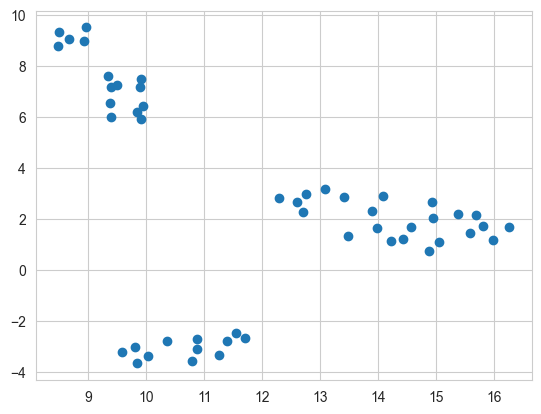

In [964]:
plt.scatter(X_umap[:,0],X_umap[:,1])

In [965]:
# DBscan con optimización de hiperparamétros

/var/folders/j7/ny069pq91p52g9t256mzzs3m0000gn/T/ipykernel_73655/3996378670.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", max(n_clusters, 1))
/var/folders/j7/ny069pq91p52g9t256mzzs3m0000gn/T/ipykernel_73655/3996378670.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", max(n_clusters, 1))
/var/folders/j7/ny069pq91p52g9t256mzzs3m0000gn/T/ipykernel_73655/3996378670.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot

GIF guardado como 'dbscan_umap_anim.gif'


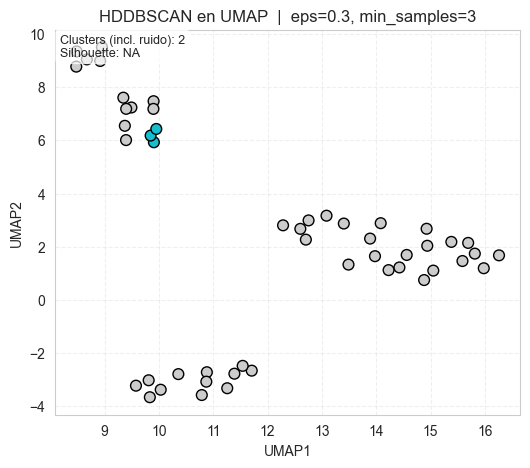

In [966]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# =====================================
# 1. Datos de entrada: embedding UMAP
# =====================================
# X_umap: array de shape (n_samples, 2)
X = X_umap   # ajusta el nombre si lo tienes distinto

# =====================================
# 2. Grid de hiperparámetros DBSCAN
# =====================================
eps_values = [0.3, 0.5, 0.7, 0.9, 1.1]
min_samples_values = [3, 4, 5]

param_list = [(e, ms) for e in eps_values for ms in min_samples_values]

# =====================================
# 3. Animación
# =====================================
fig, ax = plt.subplots(figsize=(6, 5))

def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    unique_labels = np.unique(labels)

    # ---- silhouette ----
    sil = np.nan
    if len(unique_labels) > 1:
        # si hay ruido, calculamos silhouette sólo sin ruido
        if -1 in unique_labels:
            mask = labels != -1
            if mask.sum() >= 2 and len(np.unique(labels[mask])) > 1:
                sil = silhouette_score(X[mask], labels[mask])
        else:
            sil = silhouette_score(X, labels)

    return labels, unique_labels, sil

def update(frame_idx):
    eps, min_samples = param_list[frame_idx]
    labels, unique_labels, sil = run_dbscan(eps, min_samples)

    ax.clear()

    # Mapa de colores discreto
    n_clusters = len(unique_labels)
    cmap = plt.cm.get_cmap("tab10", max(n_clusters, 1))
    colors = []

    label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
    for lab in labels:
        if lab == -1:
            # ruido en gris claro
            colors.append((0.8, 0.8, 0.8, 1.0))
        else:
            colors.append(cmap(label_to_idx[lab]))

    ax.scatter(X[:, 0], X[:, 1], s=60, c=colors, edgecolor="black")

    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.set_title(f"HDDBSCAN en UMAP  |  eps={eps}, min_samples={min_samples}")

    txt_sil = "NA"
    if not np.isnan(sil):
        txt_sil = f"{sil:.3f}"

    ax.text(
        0.01, 0.99,
        f"Clusters (incl. ruido): {n_clusters}\nSilhouette: {txt_sil}",
        transform=ax.transAxes,
        va="top", ha="left",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
        fontsize=9
    )

    ax.grid(True, linestyle="--", alpha=0.3)

    return ax

anim = FuncAnimation(
    fig,
    update,
    frames=len(param_list),
    interval=1200,  # ms entre frames (1.2 s)
    repeat=True
)

# =====================================
# 4. Ver animación en el notebook
# =====================================
HTML(anim.to_jshtml())

# =====================================
# 5. Guardar para la PPT (GIF)
# =====================================
# Necesita 'pillow' instalado: pip install pillow
anim.save("dbscan_umap_anim.gif", writer="pillow", fps=1)
print("GIF guardado como 'dbscan_umap_anim.gif'")

In [967]:
ax

<Axes: title={'center': 'HDDBSCAN en UMAP  |  eps=0.3, min_samples=3'}, xlabel='UMAP1', ylabel='UMAP2'>

# Mejores hiperparámetros

In [968]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.3)
labels_hdb = clusterer.fit_predict(X_umap)
df_fondos["UMAP1"] = X_umap[:, 0]
df_fondos["UMAP2"] = X_umap[:, 1]
df_fondos["cluster_hdbscan"] = labels_hdb

/Users/juandie/Documents/2025-02-UTEC/ACD/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/juandie/Documents/2025-02-UTEC/ACD/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [969]:
import seaborn as sns

# Paleta fija para los clusters (sin rojos)
cluster_palette = {
    0: "#6a51a3",  # morado
    1: "#3182bd",  # azul
    2: "#1b9e77",  # turquesa / verde azulado
    3: "#ffb81c",  # dorado
}

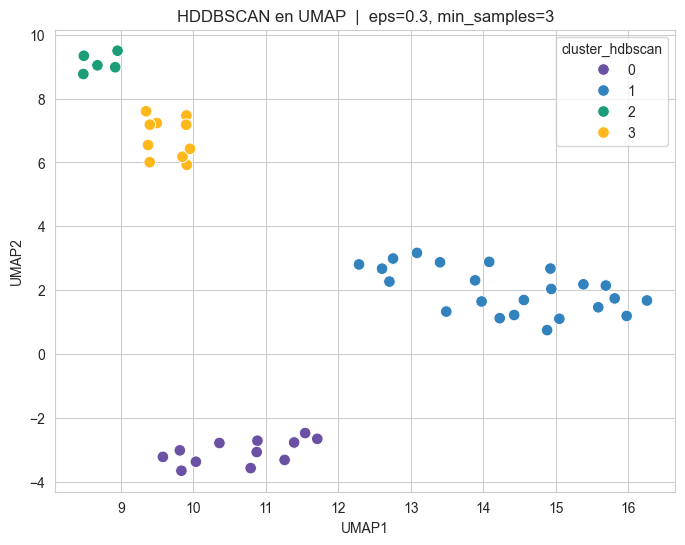

In [970]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_fondos,
    x="UMAP1", y="UMAP2",
    hue="cluster_hdbscan",
    palette=cluster_palette,   # 👈 misma paleta fija
    s=70
)
plt.title("HDDBSCAN en UMAP  |  eps=0.3, min_samples=3")
plt.show()

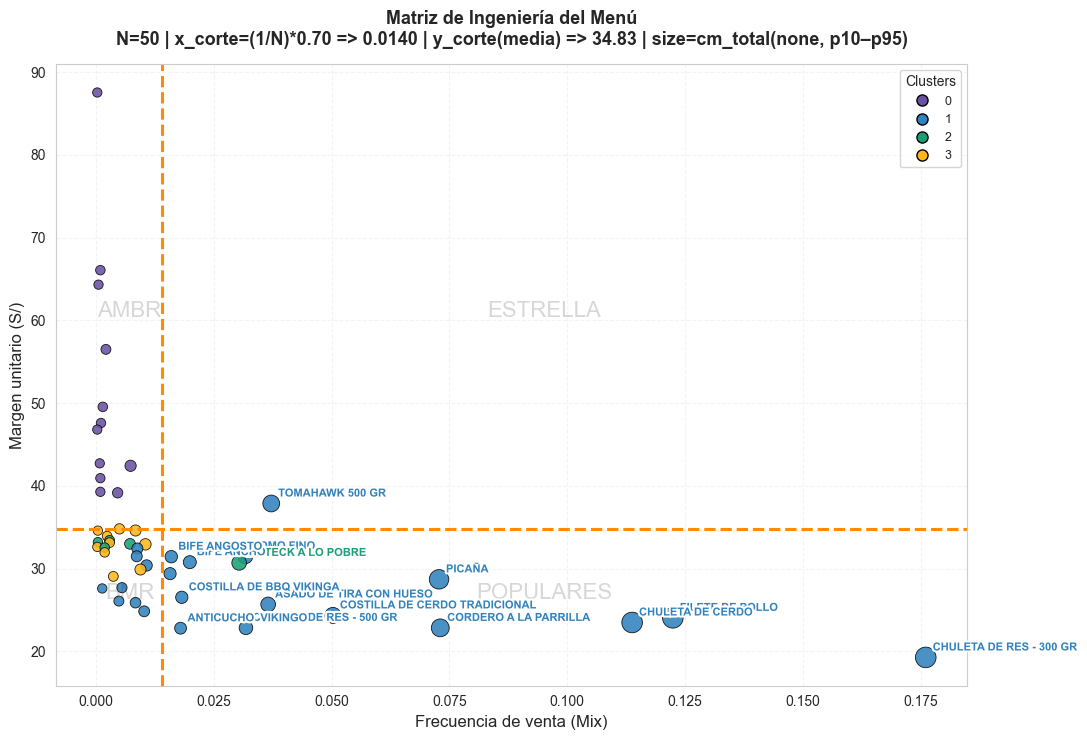

(<Figure size 1100x750 with 1 Axes>,
 <Axes: title={'center': 'Matriz de Ingeniería del Menú\nN=50 | x_corte=(1/N)*0.70 => 0.0140 | y_corte(media) => 34.83 | size=cm_total(none, p10–p95)'}, xlabel='Frecuencia de venta (Mix)', ylabel='Margen unitario (S/)'>)

In [971]:
an = MenuEngineeringAnalyzer(
    col_nombre="item_nombre",
    col_units="unidades_totales",
    col_margen="margen",
    col_categoria="categoria",
    col_cluster="cluster_hdbscan",
    popularity_factor=0.70,
    margin_method="mean",
    quadrant_labels=("ESTRELLA", "POPULARES", "AMBR", "BMR"),
)
an.fit(df_fondos)
an.plot(size_by="cm_total", size_transform="none", label_mode="topk",
        cluster_palette=cluster_palette)

In [972]:
an.table().columns

Index(['item_nombre', 'cluster_hdbscan', 'cuadrante', 'mix', 'margen',
       'unidades_totales', 'cm_total', 'cm_share', 'rank_units',
       'rank_cm_total', 'rank_margin'],
      dtype='object')

In [973]:
descriptivos = an.table().merge(
    df_fondos[["item_nombre", "q_insumos"]],on="item_nombre",how="left"
)
descriptivos["cluster_hdbscan"] = descriptivos["cluster_hdbscan"].astype(str)

In [974]:
descriptivos_cuadrantes=descriptivos.groupby("cuadrante").agg(
    cantidad=("item_nombre", "count"),
    margen_total=("cm_total", "sum"),
    share=("cm_share", "sum"),
    avg_insumos=("q_insumos", "mean"),
    margen_promedio=("margen", "mean")
)

In [975]:
descriptivos_cluster=descriptivos.groupby("cluster_hdbscan").agg(
    cantidad=("item_nombre", "count"),
    margen_total=("cm_total", "sum"),
    share=("cm_share", "sum"),
    avg_insumos=("q_insumos", "mean"),
    margen_promedio=("margen", "mean")
)

In [976]:
descriptivos_cuadrantes.round(2)

,cantidad,margen_total,share,avg_insumos,margen_promedio
cuadrante,,,,,
AMBR,12,7382.46,0.04,9.33,51.91
BMR,22,26942.48,0.14,12.86,31.19
ESTRELLA,1,10755.89,0.05,9.00,37.87
POPULARES,15,153210.66,0.77,9.07,26.29


In [977]:
descriptivos_cluster.round(2)

,cantidad,margen_total,share,avg_insumos,margen_promedio
cluster_hdbscan,,,,,
0,12,7382.46,0.04,9.33,51.91
1,23,169587.04,0.86,8.13,27.31
2,5,10227.13,0.05,20.20,32.57
3,10,11094.86,0.06,14.00,32.76


In [978]:
# Métricas

In [979]:
from sklearn.metrics import silhouette_samples
import pandas as pd
import numpy as np

# ===== Matriz sobre la que se mide el silhouette (UMAP) =====
X = df_fondos[["UMAP1", "UMAP2"]].values

# Etiquetas de cluster
labels = df_fondos["cluster_hdbscan"].values

# Si tuvieras ruido (-1), lo excluimos del cálculo
mask = labels != -1
X_valid = X[mask]
labels_valid = labels[mask]

# Silhouette de cada punto (para cada sample)
sil_samples = silhouette_samples(X_valid, labels_valid)

# DataFrame auxiliar
tmp_cluster = pd.DataFrame({
    "cluster_hdbscan": labels_valid,
    "silhouette": sil_samples
})

# Tabla por cluster
silhouette_clusters = (
    tmp_cluster
      .groupby("cluster_hdbscan", as_index=False)
      .agg(
          cantidad=("silhouette", "size"),
          silueta_promedio=("silhouette", "mean")
      )
)

# Fila global
sil_global = sil_samples.mean()
silhouette_clusters.loc[len(silhouette_clusters)] = [
    "GLOBAL",
    int(tmp_cluster.shape[0]),
    sil_global
]

# Redondeo bonito
silhouette_clusters["silueta_promedio"] = silhouette_clusters["silueta_promedio"].round(3)

silhouette_clusters.round(2)

,cluster_hdbscan,cantidad,silueta_promedio
0,0,12,0.83
1,1,23,0.70
2,2,5,0.80
3,3,10,0.64
4,GLOBAL,50,0.73


# Mejorando el criterio de optimización del portafolio Split jerárquico adaptativo por silhouette

In [980]:
df_recetas = pd.read_csv("df_recetas.csv")

In [981]:
df_con_score = pop_mean( #IPIP
    df_recetas,
    "codigo_producto",
    "cod_insumo",
    "subcategoria_llm",
    categoria="PLATO_FONDO_INDIVIDUAL"
)

In [982]:
df_fondos=df_fondos.merge(
    df_con_score[["codigo_producto","pop_mean"]],
    on="codigo_producto",
    how="left"
)

In [983]:
df_fondos.shape

(50, 9)

In [984]:
df_model= df_fondos[df_fondos["cluster_hdbscan"] != 1]

In [985]:
df_model["margen_total"] = df_model["unidades_totales"] * df_model["margen"]

/var/folders/j7/ny069pq91p52g9t256mzzs3m0000gn/T/ipykernel_73655/1818140153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["margen_total"] = df_model["unidades_totales"] * df_model["margen"]


In [986]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_model[["pop_mean", "margen_total"]].values
X_scaled = StandardScaler().fit_transform(X)

n_samples = X_scaled.shape[0]
print("n muestras para clustering:", n_samples)

n muestras para clustering: 27


/var/folders/j7/ny069pq91p52g9t256mzzs3m0000gn/T/ipykernel_73655/2241279417.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  res.fig_dendrogram.show()


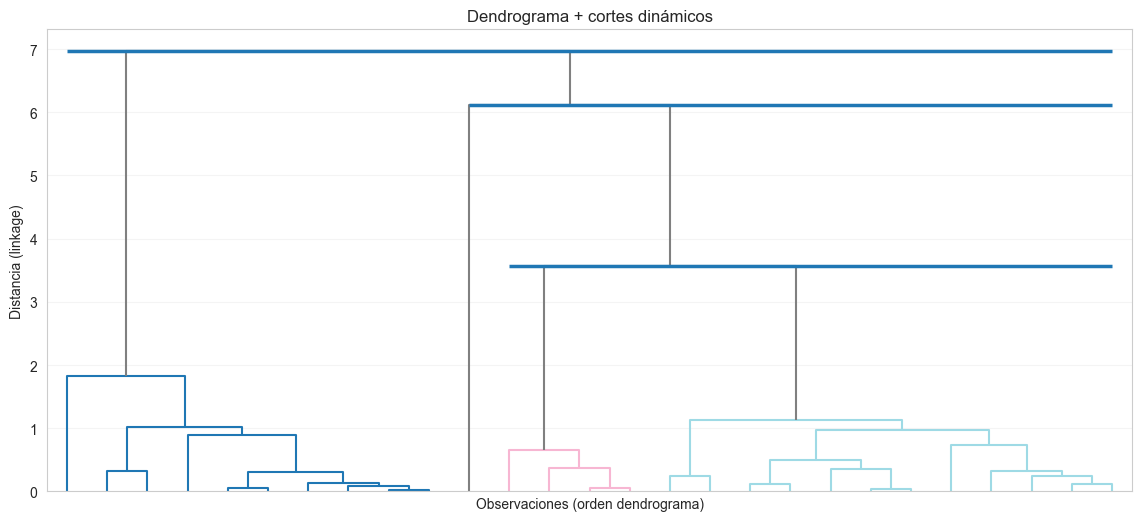

In [987]:
import pandas as pd
import matplotlib.pyplot as plt
from hac_dinamico import dynamic_hac_silhouette  # <- tu archivo hac_dinamico.py

# 1) Corre clustering dinámico (genera figuras adentro)
res = dynamic_hac_silhouette(
    X=X_scaled,
    ids=df_model.index,   # OJO: debe tener el mismo orden/filas que X_scaled
    min_sil=0.6,
    linkage="ward",
    metric="euclidean",
    make_plots=True,
)

# 2) Outputs principales
labels_dyn = res.labels
siluetas_dyn = res.silhouette_summary

resumen_dyn = (
    pd.Series(labels_dyn, name="cluster_dyn")
      .value_counts()
      .rename_axis("cluster_dyn")
      .reset_index(name="n_items")
      .sort_values("cluster_dyn")
      .reset_index(drop=True)
)

# 3) Pegar labels al modelo y luego a df_fondos (por índice)
df_model = df_model.copy()
df_model["cluster_dyn"] = labels_dyn

df_fondos = df_fondos.copy()
df_fondos = df_fondos.join(df_model[["cluster_dyn"]], how="left")

if res.fig_scatter is not None:
    plt.close(res.fig_scatter)

res.fig_dendrogram.show()


In [988]:
siluetas_dyn

,cluster_dyn,cantidad,silueta_promedio
0,0,10,0.6419
1,1,1,0.0000
2,2,4,0.7202
3,3,12,0.6435
4,GLOBAL,27,0.6304


In [989]:
# Resultado Final

In [990]:
import numpy as np
import pandas as pd

df = df_fondos.copy()

# 1) Origen del cluster final (según tu regla)
df["modelo_origen"] = np.where(df["cluster_hdbscan"] == 1, "HDBSCAN", "JERARQUICO")

# 2) Cluster final (tu regla)
df["cluster_final"] = np.where(df["cluster_hdbscan"] == 1, df["cluster_hdbscan"], df["cluster_dyn"])

# (opcional pero recomendado) evitar colisiones de IDs: HDBSCAN 1 vs Jerárquico 1
df["cluster_final_id"] = np.where(
    df["modelo_origen"] == "HDBSCAN",
    "HDB_" + df["cluster_hdbscan"].astype(str),
    "HAC_" + df["cluster_dyn"].astype(str),
)

# 3) margen total por item
df["margen_total"] = df["unidades_totales"] * df["margen"]

# 4) Resumen por cluster_final_id (incluye modelo)
resumen = (
    df.groupby(["modelo_origen", "cluster_final_id"], dropna=False)
      .agg(
          n_items=("codigo_producto", "nunique"),
          filas=("cluster_final_id", "size"),
          margen_total=("margen_total", "sum"),
          share_base=("margen_total", "sum"),  # placeholder
          avg_q_insumos=("q_insumos", "mean"),
          avg_pop_mean=("pop_mean", "mean"),
      )
      .reset_index()
)

# 5) Share (% del margen total)
total_margen = resumen["margen_total"].sum()
resumen["share_margen"] = np.where(total_margen > 0, resumen["margen_total"] / total_margen, np.nan)

# 6) Formato final
resumen = resumen.drop(columns=["share_base"])
resumen = resumen.sort_values("margen_total", ascending=False).reset_index(drop=True)
resumen["margen_total"] = resumen["margen_total"].round(2)
resumen["share_margen"] = (resumen["share_margen"] * 100).round(2)
resumen["avg_q_insumos"] = resumen["avg_q_insumos"].round(2)
resumen["avg_pop_mean"] = resumen["avg_pop_mean"].round(3)

resumen

,modelo_origen,cluster_final_id,n_items,filas,margen_total,avg_q_insumos,avg_pop_mean,share_margen
0,HDBSCAN,HDB_1,23,23,169587.04,8.13,0.330,85.52
1,JERARQUICO,HAC_2.0,4,4,8816.86,14.75,0.111,4.45
2,JERARQUICO,HAC_1.0,1,1,7121.78,21.00,0.104,3.59
3,JERARQUICO,HAC_0.0,10,10,6908.09,9.00,0.349,3.48
4,JERARQUICO,HAC_3.0,12,12,5857.73,15.25,0.188,2.95


In [1000]:
cluster_palette = {
    "HDB_1": "#2ca02c",   # verde
    "HAC_1.0": "#6a51a3", # rojo
    "HAC_2.0": "#d62728", # naranja
    "HAC_0.0": "#f1c40f", # amarillo
    "HAC_3.0": "#d62728"  # morado (por si quieres dejar uno igual)
}

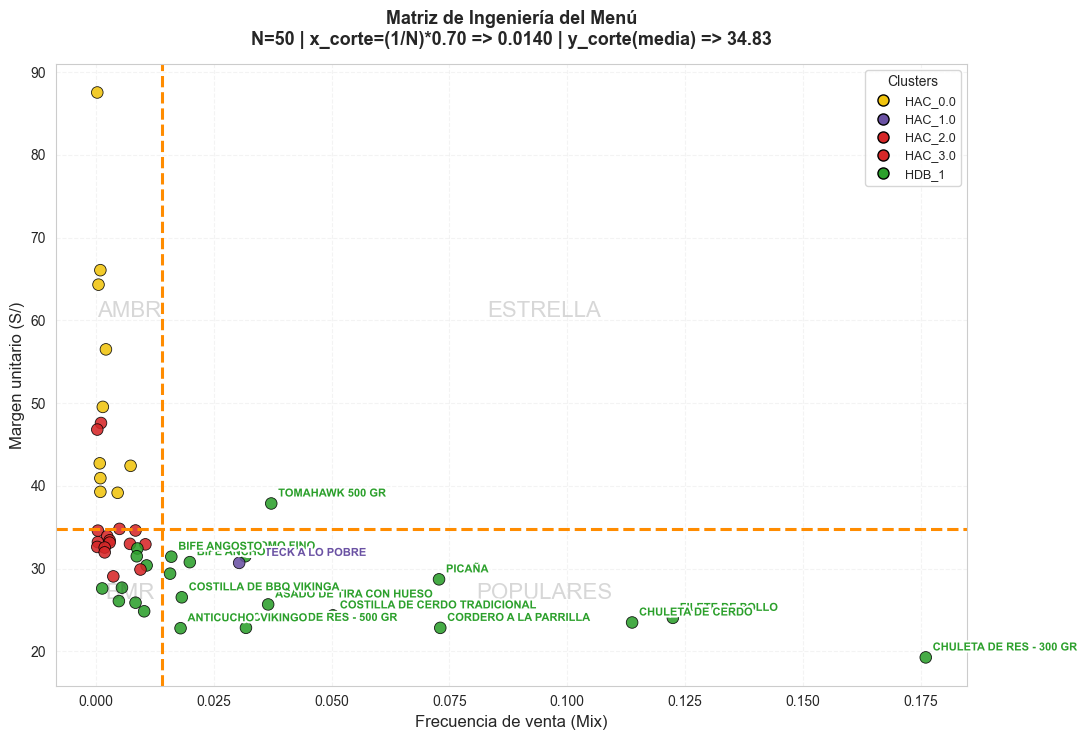

(<Figure size 1100x750 with 1 Axes>,
 <Axes: title={'center': 'Matriz de Ingeniería del Menú\nN=50 | x_corte=(1/N)*0.70 => 0.0140 | y_corte(media) => 34.83'}, xlabel='Frecuencia de venta (Mix)', ylabel='Margen unitario (S/)'>)

In [1002]:
an = MenuEngineeringAnalyzer(
    col_nombre="item_nombre",
    col_units="unidades_totales",
    col_margen="margen",
    col_categoria="categoria",
    col_cluster="cluster_final_id",
    popularity_factor=0.70,
    margin_method="mean",
    quadrant_labels=("ESTRELLA", "POPULARES", "AMBR", "BMR"),
)
an.fit(df)
an.plot( size_transform="none", label_mode="topk",
        cluster_palette=cluster_palette)

In [1005]:
an.table()

,item_nombre,cluster_final_id,cuadrante,mix,margen,unidades_totales,cm_total,cm_share,rank_units,rank_cm_total,rank_margin
0,CHULETA DE RES - 300 GR,HDB_1,POPULARES,0.176070,19.274935,1345,25924.787997,0.130741,1.0,1.0,50.0
1,FILETE DE POLLO,HDB_1,POPULARES,0.122398,24.056601,935,22492.921901,0.113434,2.0,2.0,45.0
2,CHULETA DE CERDO,HDB_1,POPULARES,0.113758,23.494935,869,20417.098788,0.102965,3.0,3.0,46.0
3,PICAÑA,HDB_1,POPULARES,0.072784,28.707331,556,15961.276051,0.080494,5.0,4.0,36.0
4,CORDERO A LA PARRILLA,HDB_1,POPULARES,0.073046,22.844935,558,12747.473905,0.064287,4.0,5.0,48.0
5,TOMAHAWK 500 GR,HDB_1,ESTRELLA,0.037178,37.872860,284,10755.892116,0.054243,7.0,6.0,13.0
6,COSTILLA DE CERDO TRADICIONAL,HDB_1,POPULARES,0.050268,24.352935,384,9351.527161,0.047161,6.0,7.0,44.0
7,LOMO FINO,HDB_1,POPULARES,0.031680,31.498624,242,7622.666942,0.038442,10.0,8.0,27.0
8,ASADO DE TIRA CON HUESO,HDB_1,POPULARES,0.036523,25.674148,279,7163.087383,0.036124,8.0,9.0,42.0
9,BISTECK A LO POBRE,HAC_1.0,POPULARES,0.030370,30.697314,232,7121.776802,0.035916,11.0,10.0,31.0
